In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# ✅ Use Seaborn's darkgrid theme properly
sns.set_theme(style="darkgrid")


In [ ]:
from google.colab import files
uploaded = files.upload()

# Read both uploaded CSVs
df_national = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df_states = pd.read_csv("Unemployment in India.csv")


Saving Unemployment in India.csv to Unemployment in India.csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [ ]:
# Clean column names
df_national.columns = [col.strip().replace(" ", "_") for col in df_national.columns]
df_states.columns = [col.strip().replace(" ", "_") for col in df_states.columns]

# Convert to datetime
df_national['Date'] = pd.to_datetime(df_national['Date'], errors='coerce')
df_states['Date'] = pd.to_datetime(df_states['Date'], errors='coerce')

# Drop rows with missing key values
df_states.dropna(subset=['Date', 'Region', 'Estimated_Unemployment_Rate_(%)'], inplace=True)

# Sort by date
df_national = df_national.sort_values('Date')
df_states = df_states.sort_values('Date')


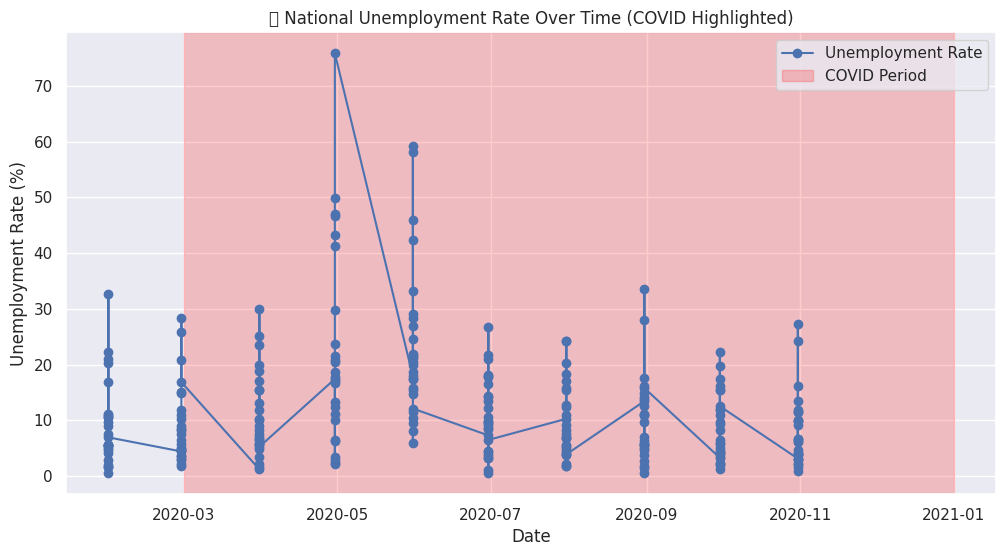

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_national['Date'], df_national['Estimated_Unemployment_Rate_(%)'], marker='o', label='Unemployment Rate')

# Highlight COVID period
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-01-01"), color='red', alpha=0.2, label='COVID Period')
plt.title("📈 National Unemployment Rate Over Time (COVID Highlighted)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


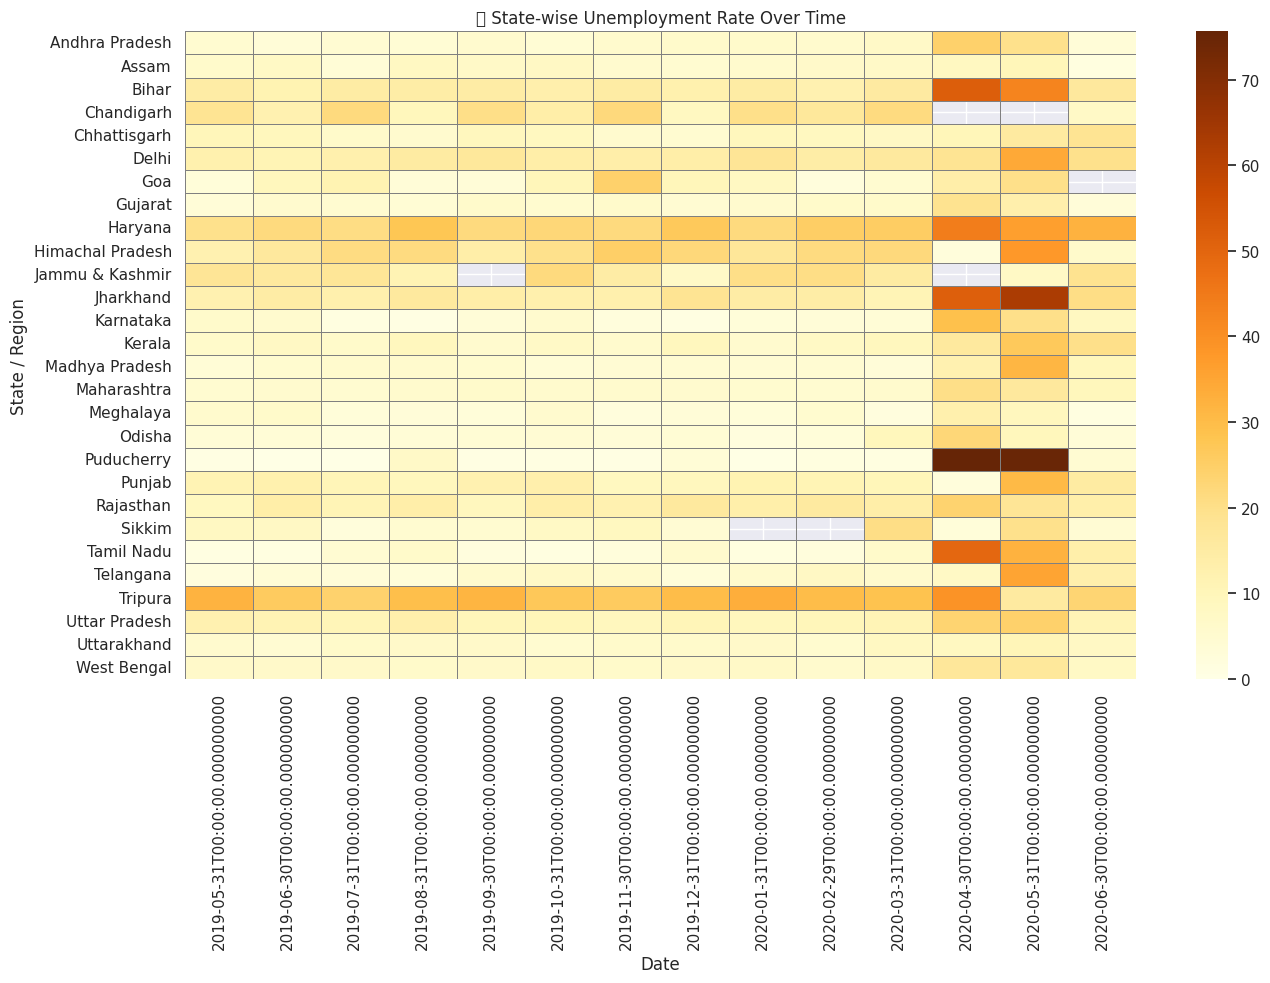

In [ ]:
# Create pivot table for heatmap
heatmap_data = df_states.pivot_table(values='Estimated_Unemployment_Rate_(%)', index='Region', columns='Date')

# Plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5, linecolor='gray')
plt.title("📍 State-wise Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("State / Region")
plt.tight_layout()
plt.show()


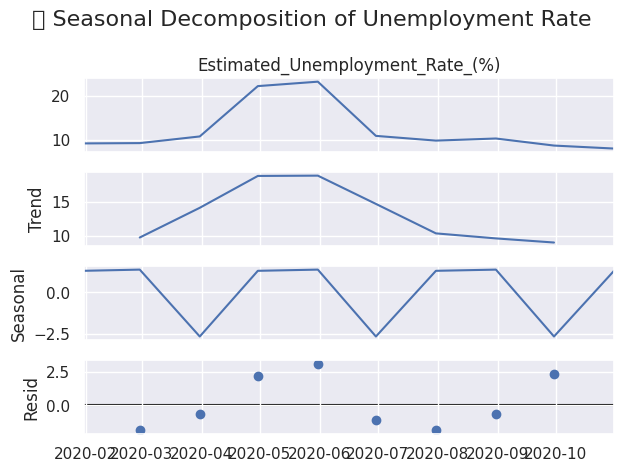

In [ ]:
# Set index and resample
df_national.set_index('Date', inplace=True)
ts = df_national['Estimated_Unemployment_Rate_(%)'].resample('M').mean()

# Decompose
decomposition = seasonal_decompose(ts.dropna(), model='additive', period=3)
decomposition.plot()
plt.suptitle("📊 Seasonal Decomposition of Unemployment Rate", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
mean_rate = ts.mean()
max_rate = ts.max()
min_rate = ts.min()

# COVID period average
covid_avg = ts['2020-03-01':'2020-12-01'].mean()
pre_covid_avg = ts['2019-01-01':'2020-02-01'].mean()

print("📊 Average Unemployment Rate:", round(mean_rate, 2), "%")
print("🔺 Max Rate:", round(max_rate, 2), "%")
print("📉 Min Rate:", round(min_rate, 2), "%")
print(f"\n🦠 COVID Period Avg: {covid_avg:.2f}%")
print(f"⏳ Pre-COVID Period Avg: {pre_covid_avg:.2f}%")

if covid_avg > pre_covid_avg:
    print("⚠️ Insight: COVID-19 caused a spike in unemployment.")
else:
    print("✅ Insight: Unemployment was stable or improved during COVID.")


📊 Average Unemployment Rate: 12.25 %
🔺 Max Rate: 23.24 %
📉 Min Rate: 8.03 %

🦠 COVID Period Avg: 13.01%
⏳ Pre-COVID Period Avg: 9.20%
⚠️ Insight: COVID-19 caused a spike in unemployment.
